In [10]:

%pip install matplotlib pandas seaborn scikit-learn imbalanced-learn

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


I can help you run Jupyter notebook cells in Visual Studio Code. The error you're seeing indicates an incompatibility between numpy and pandas.



# Data Collection

In [17]:
# Load the datasets
file_ispu = "D:\\KULIAH\\SEMESTER 6\\PROYEK DATA MINING\\DATASET\\DATA MINING\\Data Indeks Standar Pencemar Udara (ISPU) di Provinsi DKI Jakarta.csv"
file_population = "D:\\KULIAH\\SEMESTER 6\\PROYEK DATA MINING\\DATASET\\DATA MINING\\Data Kepadatan Penduduk Provinsi DKI Jakarta.csv"



# Reload datasets with correct delimiter
df_ispu = pd.read_csv(file_ispu, delimiter=';')
df_population = pd.read_csv(file_population, delimiter=';')

# Display first few rows of both datasets in a well-formatted table
from IPython.display import display

print("📌 **Data ISPU (Indeks Standar Pencemar Udara)**")
display(df_ispu.head())

print("\n📌 **Data Kepadatan Penduduk DKI Jakarta**")
display(df_population.head())



📌 **Data ISPU (Indeks Standar Pencemar Udara)**


,periode_data,bulan,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori
0,202401,1,21,DKI3 Jagakarsa,51.0,65.0,45.0,9.0,8.0,79.0,79.0,NaN,SEDANG
1,202401,1,22,DKI3 Jagakarsa,27.0,34.0,45.0,5.0,8.0,56.0,56.0,NaN,SEDANG
2,202401,1,23,DKI3 Jagakarsa,NaN,52.0,46.0,6.0,9.0,51.0,52.0,PM25,SEDANG
3,202401,1,24,DKI3 Jagakarsa,46.0,65.0,46.0,8.0,9.0,38.0,65.0,PM25,SEDANG
4,202401,1,25,DKI3 Jagakarsa,37.0,55.0,47.0,7.0,11.0,28.0,55.0,PM25,SEDANG



📌 **Data Kepadatan Penduduk DKI Jakarta**


,periode_data,wilayah,kecamatan,kelurahan,jumlah_penduduk,jumlah_kepadatan
0,2024,KOTA ADM. JAKARTA PUSAT,JOHAR BARU,TANAH TINGGI,45230,71993.81
1,2024,KOTA ADM. JAKARTA UTARA,PENJARINGAN,PENJARINGAN,112592,24871.61
2,2024,KOTA ADM. JAKARTA UTARA,PENJARINGAN,KAMAL MUARA,19042,1221.74
3,2024,KOTA ADM. JAKARTA UTARA,PENJARINGAN,KAPUK MUARA,47531,5179.99
4,2024,KOTA ADM. JAKARTA UTARA,PENJARINGAN,PEJAGALAN,87481,23777.30


In [18]:
print(df_ispu.dtypes)  # Cek tipe data di dataset ISPU
print(df_population.dtypes)  # Cek tipe data di dataset Kepadatan Penduduk

periode_data                   int64
bulan                          int64
tanggal                        int64
stasiun                       object
pm_sepuluh                   float64
pm_duakomalima               float64
sulfur_dioksida              float64
karbon_monoksida             float64
ozon                         float64
nitrogen_dioksida            float64
max                          float64
parameter_pencemar_kritis     object
kategori                      object
dtype: object
periode_data          int64
wilayah              object
kecamatan            object
kelurahan            object
jumlah_penduduk       int64
jumlah_kepadatan    float64
dtype: object


# Data Cleaning

In [19]:
# Cek missing values
missing_values_ispu = df_ispu.isnull().sum()
missing_values_population = df_population.isnull().sum()

# Buat DataFrame untuk tampilan lebih rapi
df_missing_ispu = pd.DataFrame({
    "Kolom": missing_values_ispu.index,
    "Jumlah Missing": missing_values_ispu.values,
    "Persentase (%)": (missing_values_ispu.values / len(df_ispu)) * 100
})

df_missing_population = pd.DataFrame({
    "Kolom": missing_values_population.index,
    "Jumlah Missing": missing_values_population.values,
    "Persentase (%)": (missing_values_population.values / len(df_population)) * 100
})

# Hanya tampilkan kolom yang memiliki missing values
df_missing_ispu = df_missing_ispu[df_missing_ispu["Jumlah Missing"] > 0]
df_missing_population = df_missing_population[df_missing_population["Jumlah Missing"] > 0]

# Menampilkan tabel
print("📌 Missing Values pada Dataset ISPU:")
print(df_missing_ispu.to_string(index=False))

print("\n📌 Missing Values pada Dataset Population:")
print(df_missing_population.to_string(index=False))

📌 Missing Values pada Dataset ISPU:
                    Kolom  Jumlah Missing  Persentase (%)
               pm_sepuluh             112        6.120219
           pm_duakomalima              20        1.092896
          sulfur_dioksida               9        0.491803
         karbon_monoksida              12        0.655738
                     ozon               9        0.491803
        nitrogen_dioksida              26        1.420765
                      max               5        0.273224
parameter_pencemar_kritis              46        2.513661

📌 Missing Values pada Dataset Population:
Empty DataFrame
Columns: [Kolom, Jumlah Missing, Persentase (%)]
Index: []


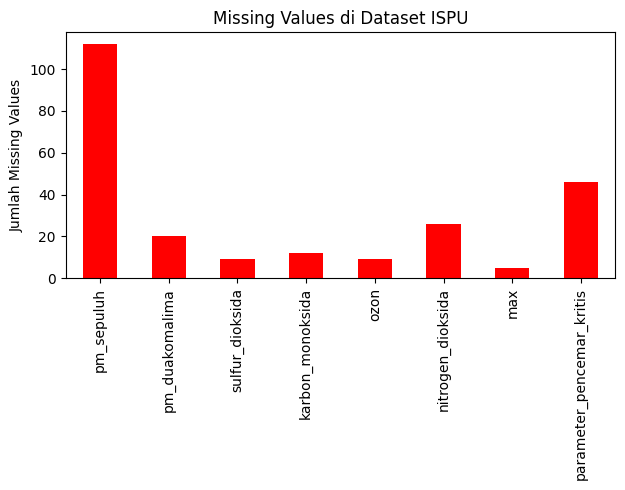

In [20]:
# Visualisasi Missing Values dengan Bar Chart
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
missing_values_ispu[missing_values_ispu > 0].plot(kind="bar", color="red")
plt.title("Missing Values di Dataset ISPU")
plt.ylabel("Jumlah Missing Values")

plt.tight_layout()
plt.show()


In [21]:
# Menghapus semua baris yang mengandung NaN dalam dataset ISPU
df_ispu_cleaned = df_ispu.dropna()

# Cek ulang apakah masih ada NaN setelah penghapusan
nan_check_after_drop = df_ispu_cleaned.isna().sum()
print("\n✅ **Semua baris dengan missing values telah dihapus!** Cek ulang jumlah NaN:")
display(nan_check_after_drop)




✅ **Semua baris dengan missing values telah dihapus!** Cek ulang jumlah NaN:


periode_data                 0
bulan                        0
tanggal                      0
stasiun                      0
pm_sepuluh                   0
pm_duakomalima               0
sulfur_dioksida              0
karbon_monoksida             0
ozon                         0
nitrogen_dioksida            0
max                          0
parameter_pencemar_kritis    0
kategori                     0
dtype: int64

In [22]:
df_ispu_cleaned.reset_index(drop=True, inplace=True)

In [23]:
# Cek missing values pada kedua dataset
missing_values_ispu = df_ispu_cleaned.isnull().sum()
missing_values_population = df_population.isnull().sum()

# Menampilkan hasil
missing_values_ispu, missing_values_population

(periode_data                 0
 bulan                        0
 tanggal                      0
 stasiun                      0
 pm_sepuluh                   0
 pm_duakomalima               0
 sulfur_dioksida              0
 karbon_monoksida             0
 ozon                         0
 nitrogen_dioksida            0
 max                          0
 parameter_pencemar_kritis    0
 kategori                     0
 dtype: int64,
 periode_data        0
 wilayah             0
 kecamatan           0
 kelurahan           0
 jumlah_penduduk     0
 jumlah_kepadatan    0
 dtype: int64)

# Cek Duplikasi Data

In [25]:
# Cek data duplikat
duplicates_ispu = df_ispu.duplicated().sum()
duplicates_population = df_population.duplicated().sum()


# Cek nilai anomali (misalnya, nilai negatif atau tidak masuk akal)
numeric_columns_ispu = df_ispu.select_dtypes(include=['number']).columns
numeric_columns_population = df_population.select_dtypes(include=['number']).columns

# Cari nilai negatif atau sangat ekstrem
outliers_ispu = df_ispu[numeric_columns_ispu].lt(0).sum()
outliers_population = df_population[numeric_columns_population].lt(0).sum()

# Menampilkan hasil
{
    "Duplikasi Data": {"ISPU": duplicates_ispu, "Population": duplicates_population},
    "Nilai Negatif": {"ISPU": outliers_ispu[outliers_ispu > 0], "Population": outliers_population[outliers_population > 0]}
}


{'Duplikasi Data': {'ISPU': np.int64(0), 'Population': np.int64(0)},
 'Nilai Negatif': {'ISPU': Series([], dtype: int64),
  'Population': Series([], dtype: int64)}}


📌 Cek Data Duplikat:
✅ ISPU: 0 duplikat
✅ Population: 0 duplikat

📌 Nilai Anomali (Negatif) pada ISPU:
✅ Tidak ditemukan nilai negatif.

📌 Nilai Anomali (Negatif) pada Population:
✅ Tidak ditemukan nilai negatif.


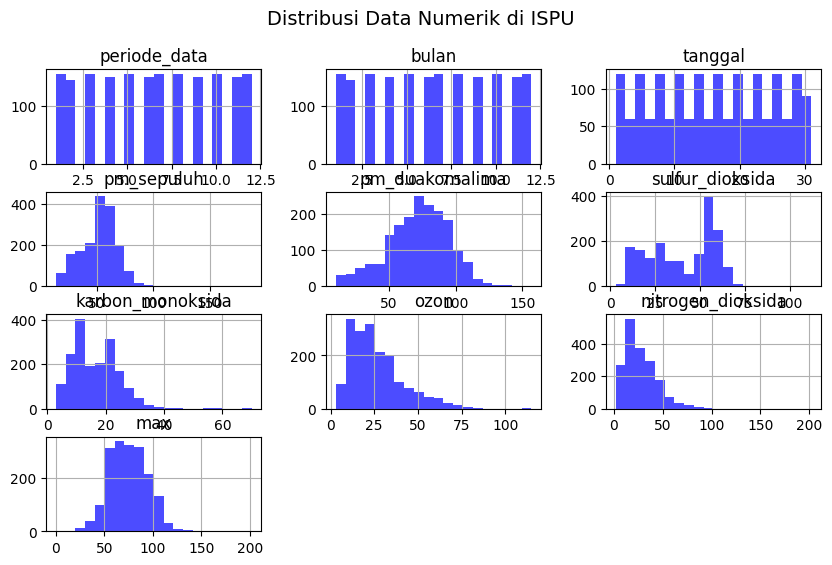

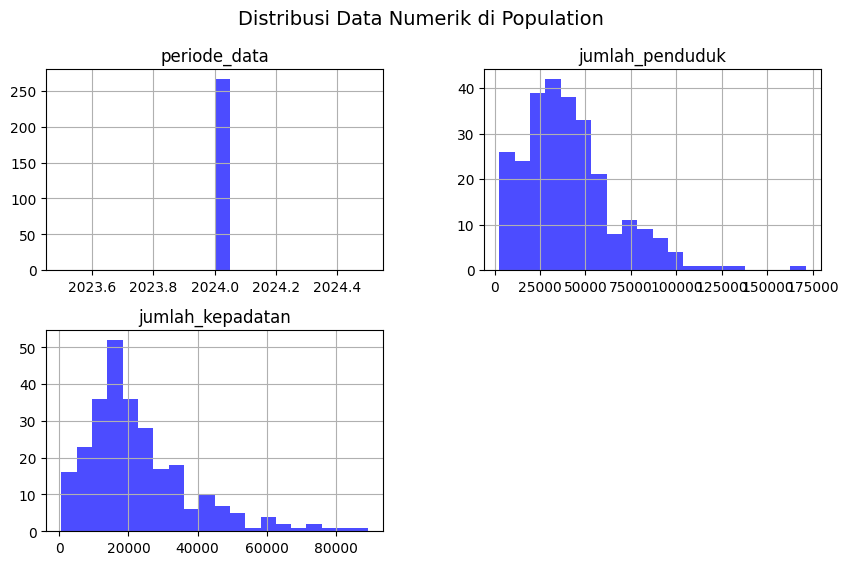

<ipython-input-10-e601e38e15e4>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


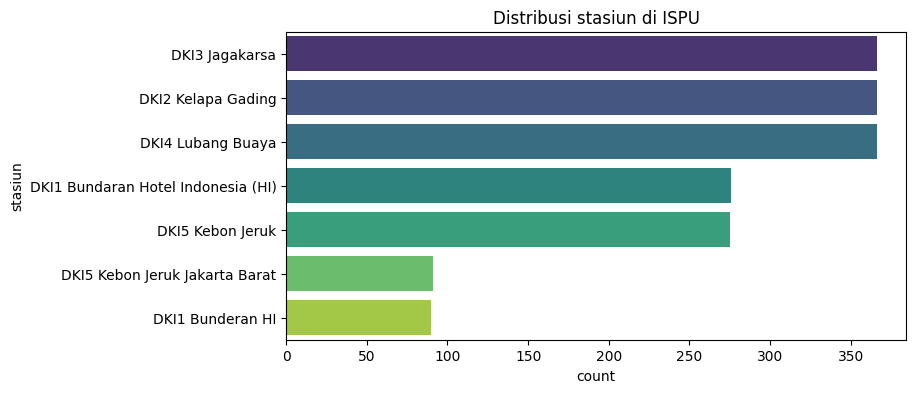

<ipython-input-10-e601e38e15e4>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


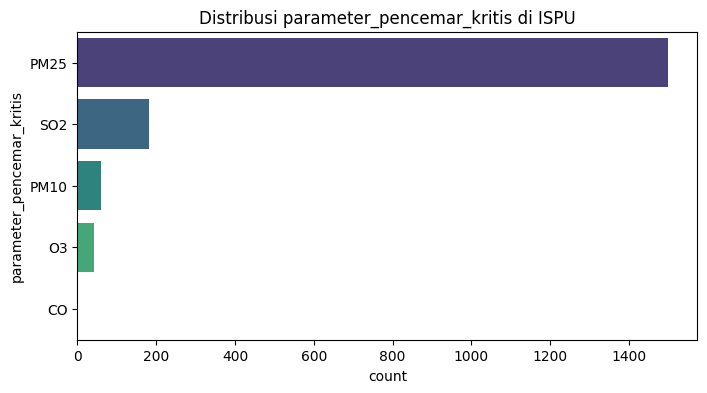

<ipython-input-10-e601e38e15e4>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


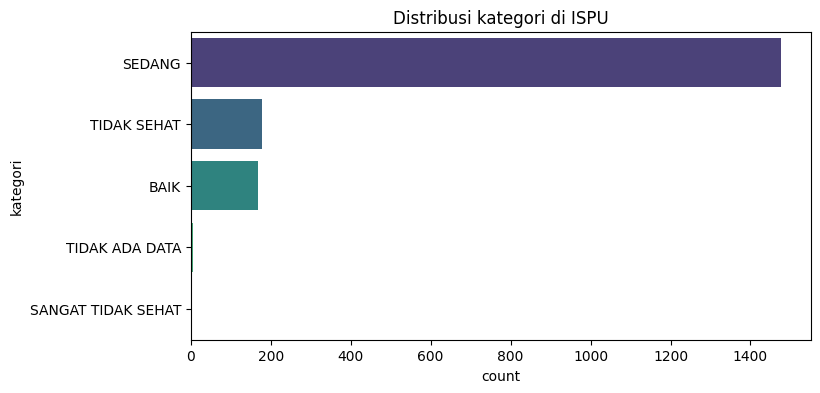

<ipython-input-10-e601e38e15e4>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


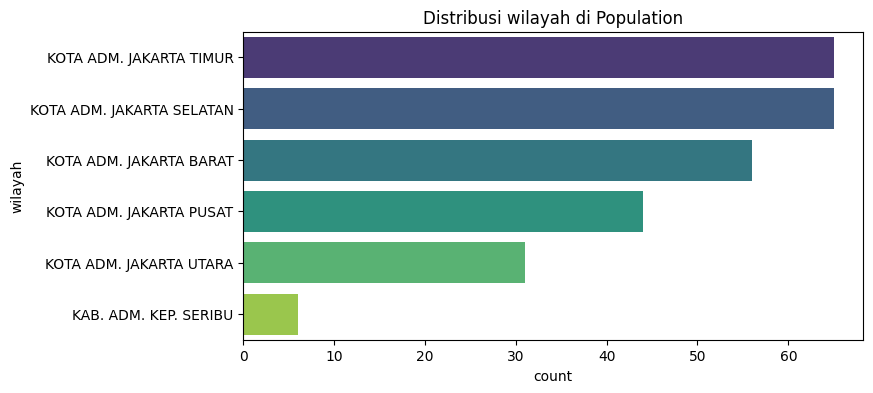

<ipython-input-10-e601e38e15e4>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


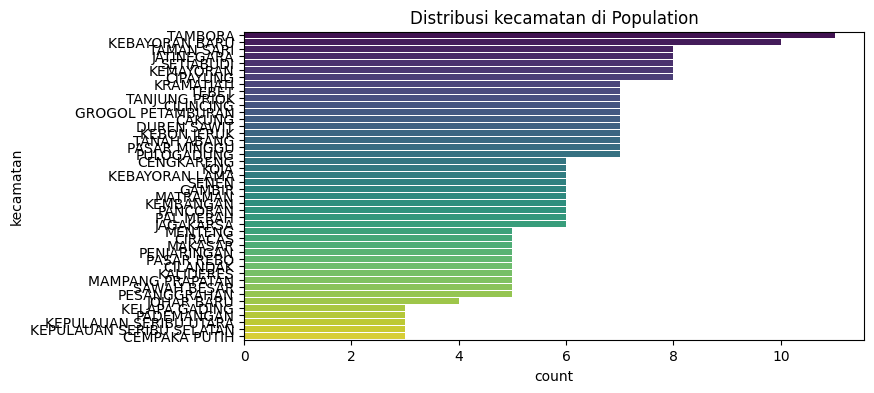

<ipython-input-10-e601e38e15e4>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


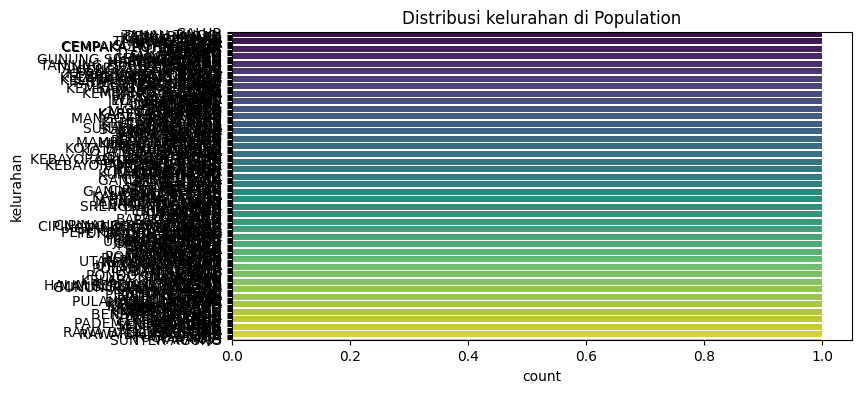

In [ ]:
# 1️⃣ Cek Data Duplikat
duplicates_ispu = df_ispu.duplicated().sum()
duplicates_population = df_population.duplicated().sum()

print("\n📌 Cek Data Duplikat:")
print(f"✅ ISPU: {duplicates_ispu} duplikat")
print(f"✅ Population: {duplicates_population} duplikat")


# 2️⃣ Cek Nilai Anomali (Negatif)
def cek_nilai_anomali(df, nama_dataset):
    numeric_columns = df.select_dtypes(include=['number']).columns
    outliers = df[numeric_columns].lt(0).sum()
    outliers = outliers[outliers > 0]  # Hanya tampilkan yang memiliki nilai negatif

    print(f"\n📌 Nilai Anomali (Negatif) pada {nama_dataset}:")
    if outliers.empty:
        print("✅ Tidak ditemukan nilai negatif.")
    else:
        print(outliers.to_string())

# Panggil fungsi untuk setiap dataset
cek_nilai_anomali(df_ispu, "ISPU")
cek_nilai_anomali(df_population, "Population")


# 3️⃣ Visualisasi Distribusi Data Numerik
def visualisasi_distribusi(df, nama_dataset):
    numeric_columns = df.select_dtypes(include=['number']).columns
    df[numeric_columns].hist(figsize=(10, 6), bins=20, color='blue', alpha=0.7)
    plt.suptitle(f"Distribusi Data Numerik di {nama_dataset}", fontsize=14)
    plt.show()

# Panggil fungsi
visualisasi_distribusi(df_ispu, "ISPU")
visualisasi_distribusi(df_population, "Population")


# 4️⃣ Visualisasi Distribusi Data Kategorikal
def visualisasi_kategorikal(df, nama_dataset):
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
        plt.title(f"Distribusi {col} di {nama_dataset}")
        plt.show()

# Panggil fungsi
visualisasi_kategorikal(df_ispu, "ISPU")
visualisasi_kategorikal(df_population, "Population")


In [ ]:
df_ispu_cleaned.head()

,periode_data,bulan,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori
0,202401,1,24,DKI3 Jagakarsa,46.0,65.0,46.0,8.0,9.0,38.0,65.0,PM25,SEDANG
1,202401,1,25,DKI3 Jagakarsa,37.0,55.0,47.0,7.0,11.0,28.0,55.0,PM25,SEDANG
2,202401,1,26,DKI3 Jagakarsa,43.0,62.0,50.0,7.0,15.0,14.0,62.0,PM25,SEDANG
3,202401,1,27,DKI3 Jagakarsa,40.0,52.0,48.0,8.0,12.0,10.0,52.0,PM25,SEDANG
4,202401,1,28,DKI3 Jagakarsa,40.0,62.0,48.0,12.0,12.0,18.0,62.0,PM25,SEDANG


In [ ]:
# Ubah semua nilai 'periode_data' di dataset ISPU menjadi 2024
df_ispu_cleaned['periode_data'] = 2024

# Cek apakah perubahan berhasil
df_ispu_cleaned[['periode_data']].drop_duplicates()

<ipython-input-12-5e2892ef44b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ispu_cleaned['periode_data'] = 2024


,periode_data
0,2024


In [ ]:
df_ispu_cleaned.head()

,periode_data,bulan,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori
0,2024,1,24,DKI3 Jagakarsa,46.0,65.0,46.0,8.0,9.0,38.0,65.0,PM25,SEDANG
1,2024,1,25,DKI3 Jagakarsa,37.0,55.0,47.0,7.0,11.0,28.0,55.0,PM25,SEDANG
2,2024,1,26,DKI3 Jagakarsa,43.0,62.0,50.0,7.0,15.0,14.0,62.0,PM25,SEDANG
3,2024,1,27,DKI3 Jagakarsa,40.0,52.0,48.0,8.0,12.0,10.0,52.0,PM25,SEDANG
4,2024,1,28,DKI3 Jagakarsa,40.0,62.0,48.0,12.0,12.0,18.0,62.0,PM25,SEDANG


# Data Integrasion / Integrasi Data

In [ ]:
# Memberi nama kolom yang sesuai
df_population .columns = ["periode_data", "wilayah", "kecamatan", "kelurahan", "jumlah_penduduk", "jumlah_kepadatan"]

# Konversi jumlah_penduduk dan jumlah_kepadatan ke tipe numerik
df_population ["jumlah_penduduk"] = pd.to_numeric(df_population ["jumlah_penduduk"], errors="coerce")
df_population ["jumlah_kepadatan"] = pd.to_numeric(df_population ["jumlah_kepadatan"], errors="coerce")

# Mapping stasiun ISPU ke wilayah
station_to_wilayah = {
    "DKI1 Bunderan HI": "KOTA ADM. JAKARTA PUSAT",
    "DKI1 Bundaran Hotel Indonesia (HI)": "KOTA ADM. JAKARTA PUSAT",
    "DKI2 Kelapa Gading": "KOTA ADM. JAKARTA UTARA",
    "DKI3 Jagakarsa": "KOTA ADM. JAKARTA SELATAN",
    "DKI4 Lubang Buaya": "KOTA ADM. JAKARTA TIMUR",
    "DKI5 Kebon Jeruk": "KOTA ADM. JAKARTA BARAT",
    "DKI5 Kebon Jeruk Jakarta Barat": "KOTA ADM. JAKARTA BARAT"
}

# Menambahkan kolom wilayah ke df_ispu_cleaned
df_ispu_cleaned["wilayah"] = df_ispu_cleaned["stasiun"].map(station_to_wilayah)

# Melakukan merge dengan dataset kepadatan penduduk berdasarkan wilayah
df_merged = pd.merge(df_ispu_cleaned, df_population , on="wilayah", how="left")

# Menampilkan hasil merge
df_merged.head()


<ipython-input-14-e26353c4d706>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ispu_cleaned["wilayah"] = df_ispu_cleaned["stasiun"].map(station_to_wilayah)


,periode_data_x,bulan,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori,wilayah,periode_data_y,kecamatan,kelurahan,jumlah_penduduk,jumlah_kepadatan
0,2024,1,24,DKI3 Jagakarsa,46.0,65.0,46.0,8.0,9.0,38.0,65.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2024,TEBET,TEBET TIMUR,20855,15840.82
1,2024,1,24,DKI3 Jagakarsa,46.0,65.0,46.0,8.0,9.0,38.0,65.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2024,TEBET,TEBET BARAT,24533,14940.42
2,2024,1,24,DKI3 Jagakarsa,46.0,65.0,46.0,8.0,9.0,38.0,65.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2024,TEBET,MENTENG DALAM,42737,17640.39
3,2024,1,24,DKI3 Jagakarsa,46.0,65.0,46.0,8.0,9.0,38.0,65.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2024,TEBET,KEBON BARU,41690,32800.69
4,2024,1,24,DKI3 Jagakarsa,46.0,65.0,46.0,8.0,9.0,38.0,65.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2024,TEBET,BUKIT DURI,40340,37612.79


In [ ]:
# Agregasi data kepadatan penduduk per wilayah
df_population_agg = df_population.groupby("wilayah")[["jumlah_penduduk", "jumlah_kepadatan"]].sum().reset_index()

# Melakukan merge ulang dengan data ISPU berdasarkan wilayah
df_merged_fixed = pd.merge(df_ispu_cleaned, df_population_agg, on="wilayah", how="left")

# Cek jumlah baris setelah perbaikan
df_merged_fixed.shape


(1641, 16)

In [ ]:
df_merged_fixed.head()

,periode_data,bulan,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori,wilayah,jumlah_penduduk,jumlah_kepadatan
0,2024,1,24,DKI3 Jagakarsa,46.0,65.0,46.0,8.0,9.0,38.0,65.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2331411,1150368.49
1,2024,1,25,DKI3 Jagakarsa,37.0,55.0,47.0,7.0,11.0,28.0,55.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2331411,1150368.49
2,2024,1,26,DKI3 Jagakarsa,43.0,62.0,50.0,7.0,15.0,14.0,62.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2331411,1150368.49
3,2024,1,27,DKI3 Jagakarsa,40.0,52.0,48.0,8.0,12.0,10.0,52.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2331411,1150368.49
4,2024,1,28,DKI3 Jagakarsa,40.0,62.0,48.0,12.0,12.0,18.0,62.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2331411,1150368.49


In [ ]:
# Simpan dataset ke file CSV
df_merged_fixed.to_csv('cleaned_dataset.csv', index=False)
# Download file
files.download('cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Menghapus Class CO pada datset yang sudah di merge

In [ ]:
from collections import Counter

# Hapus baris dengan kategori "co"
df_merged_fixed_filtered = df_merged_fixed[df_merged_fixed["parameter_pencemar_kritis"].str.lower() != "co"]

# Cek distribusi kelas setelah penghapusan
class_counts_after = Counter(df_merged_fixed_filtered["parameter_pencemar_kritis"])
print("Distribusi kelas setelah penghapusan kategori 'co':", class_counts_after)


Distribusi kelas setelah penghapusan kategori 'co': Counter({'PM25': 1419, 'SO2': 131, 'PM10': 56, 'O3': 34})


In [ ]:
df_merged_fixed_filtered.head()

,periode_data,bulan,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori,wilayah,jumlah_penduduk,jumlah_kepadatan
0,2024,1,24,DKI3 Jagakarsa,46.0,65.0,46.0,8.0,9.0,38.0,65.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2331411,1150368.49
1,2024,1,25,DKI3 Jagakarsa,37.0,55.0,47.0,7.0,11.0,28.0,55.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2331411,1150368.49
2,2024,1,26,DKI3 Jagakarsa,43.0,62.0,50.0,7.0,15.0,14.0,62.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2331411,1150368.49
3,2024,1,27,DKI3 Jagakarsa,40.0,52.0,48.0,8.0,12.0,10.0,52.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2331411,1150368.49
4,2024,1,28,DKI3 Jagakarsa,40.0,62.0,48.0,12.0,12.0,18.0,62.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2331411,1150368.49


EDA TAMPILAN DATA YANG ingin di Class Imbalance

<ipython-input-20-e4f1ec972d15>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_merged_fixed_filtered["kategori"], palette="viridis")


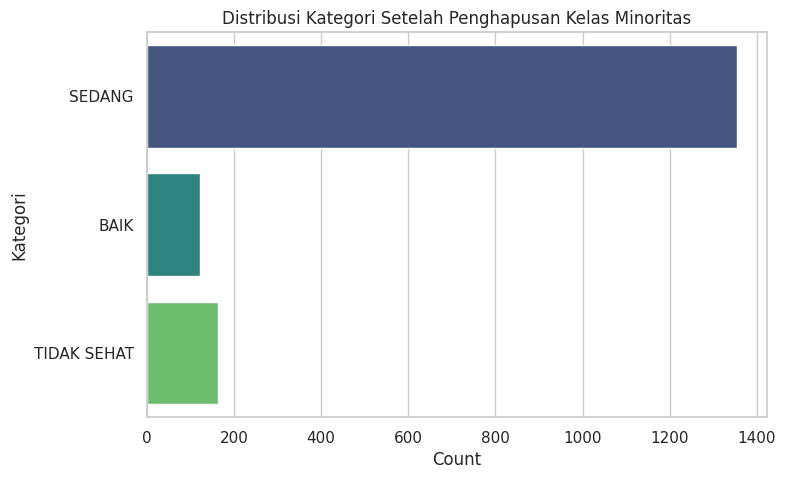

<ipython-input-20-e4f1ec972d15>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_merged_fixed_filtered["parameter_pencemar_kritis"], palette="mako")


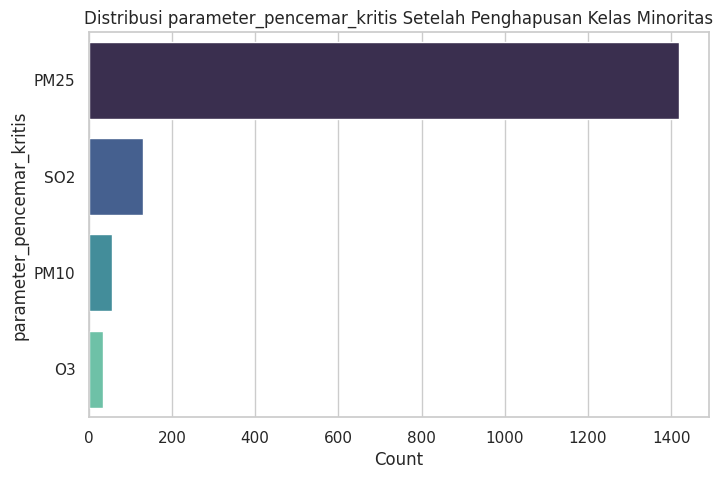

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Plot distribusi kategori setelah penghapusan kelas minoritas
plt.figure(figsize=(8, 5))
sns.countplot(y=df_merged_fixed_filtered["kategori"], palette="viridis")
plt.title("Distribusi Kategori Setelah Penghapusan Kelas Minoritas")
plt.xlabel("Count")
plt.ylabel("Kategori")
plt.show()

# Plot distribusi parameter_pencemar_kritis setelah penghapusan kelas minoritas
plt.figure(figsize=(8, 5))
sns.countplot(y=df_merged_fixed_filtered["parameter_pencemar_kritis"], palette="mako")
plt.title("Distribusi parameter_pencemar_kritis Setelah Penghapusan Kelas Minoritas")
plt.xlabel("Count")
plt.ylabel("parameter_pencemar_kritis")
plt.show()

In [ ]:
# Simpan dataset ke file CSV
df_merged_fixed_filtered.to_csv('cleaned_dataset.csv', index=False)
# Download file
files.download('cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Random Oversampling

In [ ]:
!pip install imbalanced-learn


In [ ]:
# Menampilkan informasi awal dataset
df_merged_fixed_filtered.info(), df_merged_fixed_filtered.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1640 entries, 0 to 1640
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   periode_data               1640 non-null   int64  
 1   bulan                      1640 non-null   int64  
 2   tanggal                    1640 non-null   int64  
 3   stasiun                    1640 non-null   object 
 4   pm_sepuluh                 1640 non-null   float64
 5   pm_duakomalima             1640 non-null   float64
 6   sulfur_dioksida            1640 non-null   float64
 7   karbon_monoksida           1640 non-null   float64
 8   ozon                       1640 non-null   float64
 9   nitrogen_dioksida          1640 non-null   float64
 10  max                        1640 non-null   float64
 11  parameter_pencemar_kritis  1640 non-null   object 
 12  kategori                   1640 non-null   object 
 13  wilayah                    1640 non-null   object 
 1

(None,
    periode_data  bulan  tanggal         stasiun  pm_sepuluh  pm_duakomalima  \
 0          2024      1       24  DKI3 Jagakarsa        46.0            65.0   
 1          2024      1       25  DKI3 Jagakarsa        37.0            55.0   
 2          2024      1       26  DKI3 Jagakarsa        43.0            62.0   
 3          2024      1       27  DKI3 Jagakarsa        40.0            52.0   
 4          2024      1       28  DKI3 Jagakarsa        40.0            62.0   
 
    sulfur_dioksida  karbon_monoksida  ozon  nitrogen_dioksida   max  \
 0             46.0               8.0   9.0               38.0  65.0   
 1             47.0               7.0  11.0               28.0  55.0   
 2             50.0               7.0  15.0               14.0  62.0   
 3             48.0               8.0  12.0               10.0  52.0   
 4             48.0              12.0  12.0               18.0  62.0   
 
   parameter_pencemar_kritis kategori                    wilayah  \
 0       

In [ ]:
label_encoders = {}
for col in ['stasiun', 'parameter_pencemar_kritis', 'kategori', 'wilayah']:
    le = LabelEncoder()
    df_merged_fixed_filtered[col] = le.fit_transform(df_merged_fixed_filtered[col])
    label_encoders[col] = le  # Simpan encoder untuk digunakan kembali


<ipython-input-24-053c858b6355>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_fixed_filtered[col] = le.fit_transform(df_merged_fixed_filtered[col])
<ipython-input-24-053c858b6355>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_fixed_filtered[col] = le.fit_transform(df_merged_fixed_filtered[col])
<ipython-input-24-053c858b6355>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Inisialisasi LabelEncoder
# label_encoders = {}
# encoded_columns = {}

# # Konversi kolom bertipe object menjadi numerik
# for col in ['stasiun', 'parameter_pencemar_kritis', 'kategori', 'wilayah']:
#     le = LabelEncoder()
#     df[col + "_encoded"] = le.fit_transform(df[col])
#     label_encoders[col] = le
#     encoded_columns[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# # Menampilkan hasil encoding
# df.head(), encoded_columns


In [ ]:
df_merged_fixed_filtered.head()

,periode_data,bulan,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori,wilayah,jumlah_penduduk,jumlah_kepadatan
0,2024,1,24,3,46.0,65.0,46.0,8.0,9.0,38.0,65.0,2,1,2,2331411,1150368.49
1,2024,1,25,3,37.0,55.0,47.0,7.0,11.0,28.0,55.0,2,1,2,2331411,1150368.49
2,2024,1,26,3,43.0,62.0,50.0,7.0,15.0,14.0,62.0,2,1,2,2331411,1150368.49
3,2024,1,27,3,40.0,52.0,48.0,8.0,12.0,10.0,52.0,2,1,2,2331411,1150368.49
4,2024,1,28,3,40.0,62.0,48.0,12.0,12.0,18.0,62.0,2,1,2,2331411,1150368.49


In [ ]:
# Simpan dataset ke file CSV
df_merged_fixed_filtered.to_csv('cleaned_dataset.csv', index=False)
# Download file
files.download('cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.utils import resample

# Pastikan label encoding dilakukan untuk kategori yang perlu
label_encoders = {}
for col in ['parameter_pencemar_kritis', 'kategori']:
    le = LabelEncoder()
    df_merged_fixed_filtered[col] = le.fit_transform(df_merged_fixed_filtered[col])  # Gunakan fit_transform agar data tetap konsisten
    label_encoders[col] = le

# Fungsi untuk melakukan Random Oversampling manual
def upsample_minority_class(df_merged_fixed_filtered, target_col):
    max_size = df_merged_fixed_filtered[target_col].value_counts().max()  # Ambil jumlah terbesar dari kelas mayoritas
    df_merged_fixed_filtered_upsampled = pd.DataFrame()  # DataFrame kosong untuk menyimpan hasil

    # Lakukan Random Oversampling untuk setiap kelas dalam target_col
    for class_label, group in df_merged_fixed_filtered.groupby(target_col):
        df_merged_fixed_filtered_resampled = resample(group, replace=True, n_samples=max_size, random_state=42)
        df_merged_fixed_filtered_upsampled = pd.concat([df_merged_fixed_filtered_upsampled, df_merged_fixed_filtered_resampled])

    return df_merged_fixed_filtered_upsampled

# Terapkan Random Oversampling ke 'parameter_pencemar_kritis'
df_merged_fixed_filtered_resampled = upsample_minority_class(df_merged_fixed_filtered, 'parameter_pencemar_kritis')

# Terapkan Random Oversampling ke 'kategori'
df_merged_fixed_filtered_resampled = upsample_minority_class(df_merged_fixed_filtered_resampled, 'kategori')

# Periksa distribusi kelas setelah Random Oversampling
class_counts_after = df_merged_fixed_filtered_resampled[['parameter_pencemar_kritis', 'kategori']].value_counts()

class_counts_after


<ipython-input-28-7bd147d99d72>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_fixed_filtered[col] = le.fit_transform(df_merged_fixed_filtered[col])  # Gunakan fit_transform agar data tetap konsisten
<ipython-input-28-7bd147d99d72>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_fixed_filtered[col] = le.fit_transform(df_merged_fixed_filtered[col])  # Gunakan fit_transform agar data tetap konsisten


,,count
parameter_pencemar_kritis,kategori,
2,2,2539
0,0,1819
1,0,1576
3,1,1328
1,2,1217
2,1,1206
1,1,887
0,1,798
3,0,516


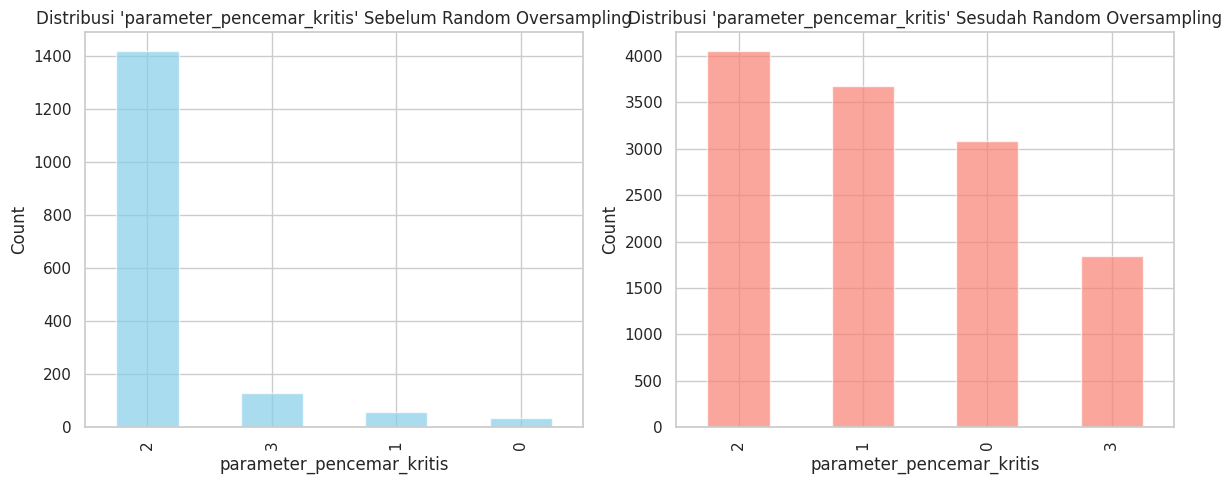

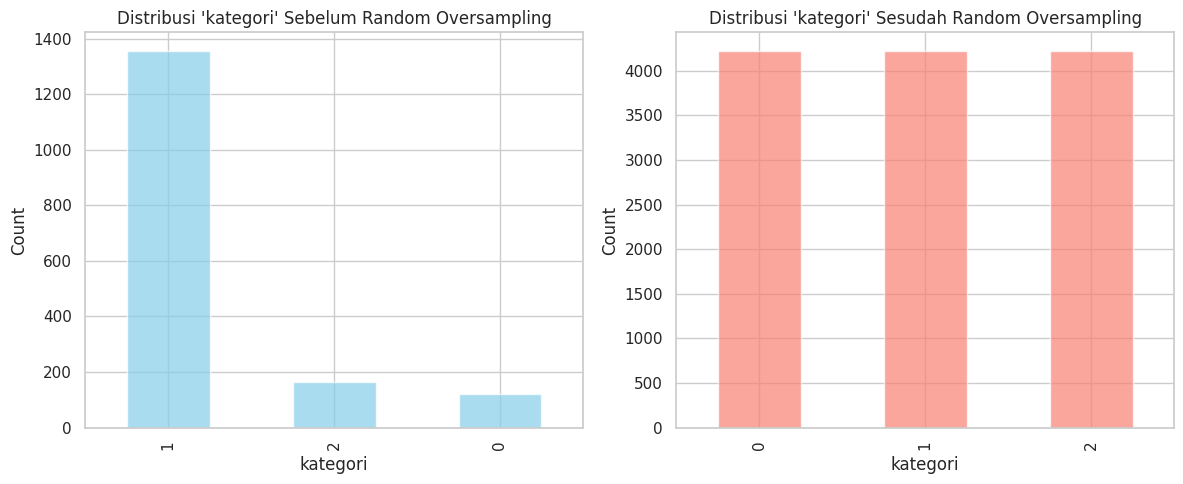

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan distribusi kelas sebelum dan sesudah Random Oversampling
def plot_class_distribution(df_before, df_after, column, title_before, title_after):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Sebelum Random Oversampling
    df_before[column].value_counts().plot(kind='bar', ax=axes[0], color='skyblue', alpha=0.7)
    axes[0].set_title(title_before)
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Count")

    # Sesudah Random Oversampling
    df_after[column].value_counts().plot(kind='bar', ax=axes[1], color='salmon', alpha=0.7)
    axes[1].set_title(title_after)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("Count")

    plt.tight_layout()
    plt.show()

# Tampilkan distribusi kelas sebelum dan sesudah Random Oversampling untuk kedua kolom
plot_class_distribution(df_merged_fixed_filtered, df_merged_fixed_filtered_resampled,
                        'parameter_pencemar_kritis',
                        "Distribusi 'parameter_pencemar_kritis' Sebelum Random Oversampling",
                        "Distribusi 'parameter_pencemar_kritis' Sesudah Random Oversampling")

plot_class_distribution(df_merged_fixed_filtered, df_merged_fixed_filtered_resampled,
                        'kategori',
                        "Distribusi 'kategori' Sebelum Random Oversampling",
                        "Distribusi 'kategori' Sesudah Random Oversampling")


In [ ]:
df_merged_fixed_filtered_resampled['kategori'].value_counts()

,count
kategori,
0,4219
1,4219
2,4219


In [ ]:
df_merged_fixed_filtered_resampled = df_merged_fixed_filtered_resampled.sort_values(
    by=['periode_data', 'bulan', 'tanggal'], ascending=[True, True, True]
).reset_index(drop=True)


In [ ]:
df_merged_fixed_filtered_resampled.head()

,periode_data,bulan,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori,wilayah,jumlah_penduduk,jumlah_kepadatan
0,2024,1,1,6,58.0,99.0,40.0,18.0,55.0,12.0,99.0,2,1,0,2556752,1596903.42
1,2024,1,1,6,58.0,99.0,40.0,18.0,55.0,12.0,99.0,2,1,0,2556752,1596903.42
2,2024,1,1,4,74.0,110.0,10.0,20.0,24.0,10.0,110.0,2,2,3,3230417,1468049.94
3,2024,1,1,4,74.0,110.0,10.0,20.0,24.0,10.0,110.0,2,2,3,3230417,1468049.94
4,2024,1,1,4,74.0,110.0,10.0,20.0,24.0,10.0,110.0,2,2,3,3230417,1468049.94


Hasil encoding untuk kolom bertipe string:

stasiun:

DKI1 Bundaran Hotel Indonesia (HI) → 0

DKI1 Bunderan HI → 1

DKI2 Kelapa Gading → 2

DKI3 Jagakarsa → 3

DKI4 Lubang Buaya → 4

DKI5 Kebon Jeruk → 5

DKI5 Kebon Jeruk Jakarta Barat → 6

parameter_pencemar_kritis:

O3 → 0

PM10 → 1

PM25 → 2

SO2 → 3

kategori:

BAIK → 0

SEDANG → 1

TIDAK SEHAT → 2

wilayah:

KOTA ADM. JAKARTA BARAT → 0

KOTA ADM. JAKARTA PUSAT → 1

KOTA ADM. JAKARTA SELATAN → 2

KOTA ADM. JAKARTA TIMUR → 3

KOTA ADM. JAKARTA UTARA → 4

In [ ]:
# Simpan dataset ke file CSV
df_merged_fixed_filtered_resampled.to_csv('cleaned_dataset.csv', index=False)
# Download file
files.download('cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>